In [560]:
#Cargando librerías 
import importlib

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd

import positioning_sensors as ps
importlib.reload(ps)

import sensor_aptitude as apt
importlib.reload(apt)

from geneticalgorithm import geneticalgorithm as ga

plt.style.use("ggplot")

 W = i*s^(p)
Selct cost functions: 
 'xor','max'


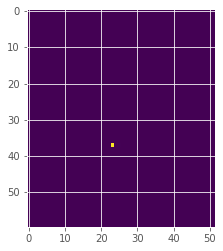

In [561]:
#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
sigma_y = 0.5
sigma_x = 0.5
sigma = [sigma_y,sigma_x]

#Loading precalculated local and directed empirical variograms
data = pd.read_csv("th100_atol_15_dirdelta_1.csv")
variogram_set = np.array(data.iloc[:,3:])
variograms = variogram_set.reshape(len(variogram_set),nonsat.shape[0],nonsat.shape[1])
coords = np.array(data.iloc[:,1:3])

#NLTI: luminance
luminance = ps.readIMG(ilumina)

#EAM: Environtmental attention map is the importance
EAM = ps.readIMG(niveles,invert=True)
EAM[37][23]+=1

nonsat = ps.desaturate(luminance,th=62)
NLTI = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')
sensitivity = ps.f6(NLTI,EAM,p=24)


aptitude = apt.SensorFitness(NLTI,EAM,sensitivity,variograms,coords)


aptitude.selectFitnessFunction("cover")
f = aptitude.f

X = np.array([37,23])
f(X)

plt.imshow(sensitivity)

Search Space Boundaries: [[ 0 60]
 [ 0 52]]
 The best solution found:                                                                           
 [29. 21.]

 Objective function:
 -586.0


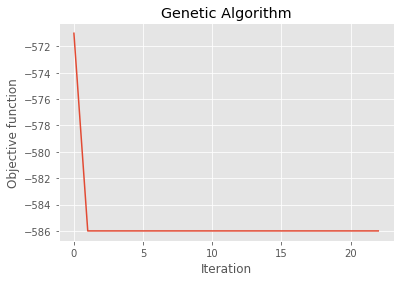

In [562]:
n_sensors = 1

#variable ranges, 2 ranges per sensor position (dim*n_sensors) 
varbound=np.array([[0,nonsat.shape[0]],[0,nonsat.shape[1]]]*n_sensors)
print("Search Space Boundaries:", varbound)

dim = len(varbound)

#algorithms_parameters={'max_num_iteration': None, 'population_size': 500, 'mutation_probability': 0.1, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': None}

model=ga(function=f,
         dimension=dim,
         algorithm_parameters={'max_num_iteration': None, 'population_size': 1000, 'mutation_probability': 0.1, 'elit_ratio': 0.01, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': None},
         variable_type='int',
         variable_boundaries=varbound)

model.run()

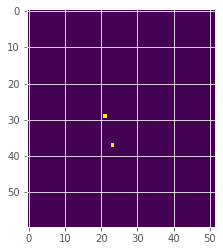

In [563]:
X = model.output_dict["variable"]

plt.imshow(aptitude.showPositions(X)*np.max(sensitivity)+sensitivity)
plt.show()

 W = i*s^(p)


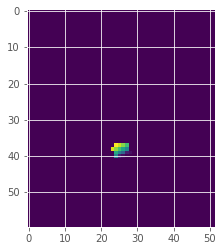

In [547]:
EAM[37][23]-=1


sensitivity = ps.f6(NLTI,EAM,p=24)
plt.imshow(sensitivity)

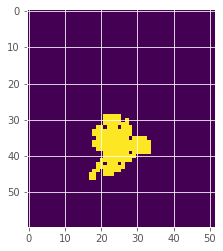

In [427]:
c = np.argwhere(sensitivity==np.max(sensitivity))

plt.imshow(aptitude.coverage(c[0])[0]>0)

In [428]:
aptitude.f(c[0])

-21853235.895400524

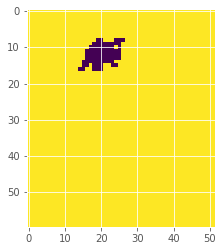

In [289]:
ix = 200

pi = NLTI[coords[ix][0]][coords[ix][1]]


tvar = variograms[ix]
outofrange = (tvar==0)*(pi**2/2)
plt.imshow(outofrange)

#we have 0 variation in the location of the sensor
tvar[coords[ix][0]][coords[ix][1]]=0

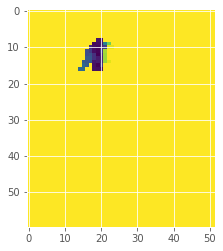

In [294]:
M = tvar+outofrange
plt.imshow(M)

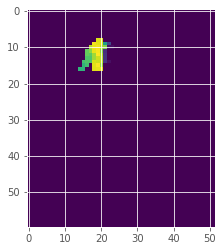

In [310]:
lb = pi**2/2
normalizedMap = (-M+lb)/lb
plt.imshow(normalizedMap)

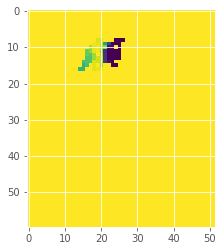

In [275]:
V = tvar+outofrange
-V+
plt.imshow(V)

In [ ]:
m = np.max(sensitivity)
plt.plot(np.arange(0,m,1))
plt.plot(np.arange(0,m,1)**4)
plt.plot(np.arange(0,m,1)**3)
plt.plot(np.arange(0,m,1)**2)
plt.plot(np.arange(0,m,1)**1)

In [460]:
np.argwhere(sensitivity==np.max(sensitivity))

array([[37, 23]])

In [467]:
sensitivity[38][24]

3.446784628160252e+18

In [468]:
sensitivity[37][23]

4.3290424569792205e+18

In [485]:
importance[37][23]=+1

4.0

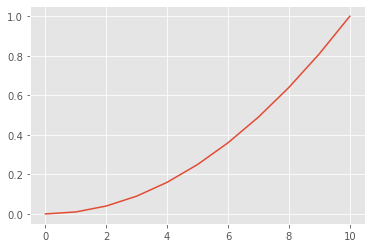

In [553]:
plt.plot(np.arange(0,1+0.1,0.1)**2)